## Task Description

You are given a dataset of handwritten numbers with two digits.
Your task is to construct and train a classifier to predict the number from the image input.
Specifically, please:
Train a deep learning model for this task with testing accuracy over 80%.


# Loading Data

## Extract From Zip

In [42]:
import zipfile

# Name and path of the ZIP file
# you can find the images on https://github.com/ahoirg/with_CNN_handwritten_digit_detection/blob/master/images.zip
zip_file_path = 'xxx' ## write images path

# Extract the ZIP file to the Colab workspace.
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_images')


## Load Data and Preparing Data

In [43]:
import os
import shutil
import random

# I want to split the train data into 2 data: train and validation.
# When I did this split operation after loading using ImageFolder, the type of the object changed.
# That's why I do the split before the Load phase.

validation_folder = '/content/extracted_images/images/validation'
if not os.path.exists(validation_folder):
    os.makedirs(validation_folder)

train_folder = '/content/extracted_images/images/train'

for i in range(100):
    train_subfolder = os.path.join(train_folder, str(i))
    validation_subfolder = os.path.join(validation_folder, str(i))

    if not os.path.exists(validation_subfolder):
        os.makedirs(validation_subfolder)

    files = os.listdir(train_subfolder)
    random.shuffle(files)

    # Move first 2 files to validation folder
    for j in range(2):
        if files:
            file_to_move = files.pop()
            source_path = os.path.join(train_subfolder, file_to_move)
            dest_path = os.path.join(validation_subfolder, file_to_move)
            shutil.move(source_path, dest_path)

In [44]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert images to single channel
    transforms.Resize((28, 28)),  # Resizes all images to 28x28.
    transforms.ToTensor(),  # Converts the image into numbers, that are understandable by the system.
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalization (convert the data from the range [0, 1] to the range [-1, 1]).
])

In [45]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

train = ImageFolder(root='/content/extracted_images/images/train', transform=transform)
validation = ImageFolder(root='/content/extracted_images/images/validation', transform=transform)
test = ImageFolder(root='/content/extracted_images/images/test', transform=transform)

In [46]:
first_15_class_to_idx = {class_name: class_idx for class_name, class_idx in train.class_to_idx.items() if class_idx < 15}

first_15_class_to_idx

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14}

Class values ​​and index values ​​are different from each other.
In fact, it does not cause any problems in training and testing the Model. The model will already know which label belongs to which class.

However, during the **Manual Testing** phase (you can find it below the page), when I present it in a png file, it will be confusing as it will write the label corresponding to the class (for example, it will write 11 for class '19').

Therefore, I make the class and label values ​​the same.

In [47]:
class_to_idx = {}  # An empty dictionary
for i in range(100):
    class_name = str(i)  # Get the class name
    class_to_idx[class_name] = i  # Associate class name with integer value

train.class_to_idx = class_to_idx
validation.class_to_idx = class_to_idx
test.class_to_idx = class_to_idx

first_15_class_to_idx = {class_name: class_idx for class_name, class_idx in train.class_to_idx.items() if class_idx < 15}

first_15_class_to_idx

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '10': 10,
 '11': 11,
 '12': 12,
 '13': 13,
 '14': 14}

In [48]:
print("Number Of Total Train Classes:", len(train.classes))

print("Number Of Total Validation Classes:", len(validation.classes))

print("Number Of Total Test Classes:", len(test.classes))

Number Of Total Train Classes: 100
Number Of Total Validation Classes: 100
Number Of Total Test Classes: 100


To check if everything is OK, I randomly select a class from 3 data types and print the .png files they represent on the screen.

train


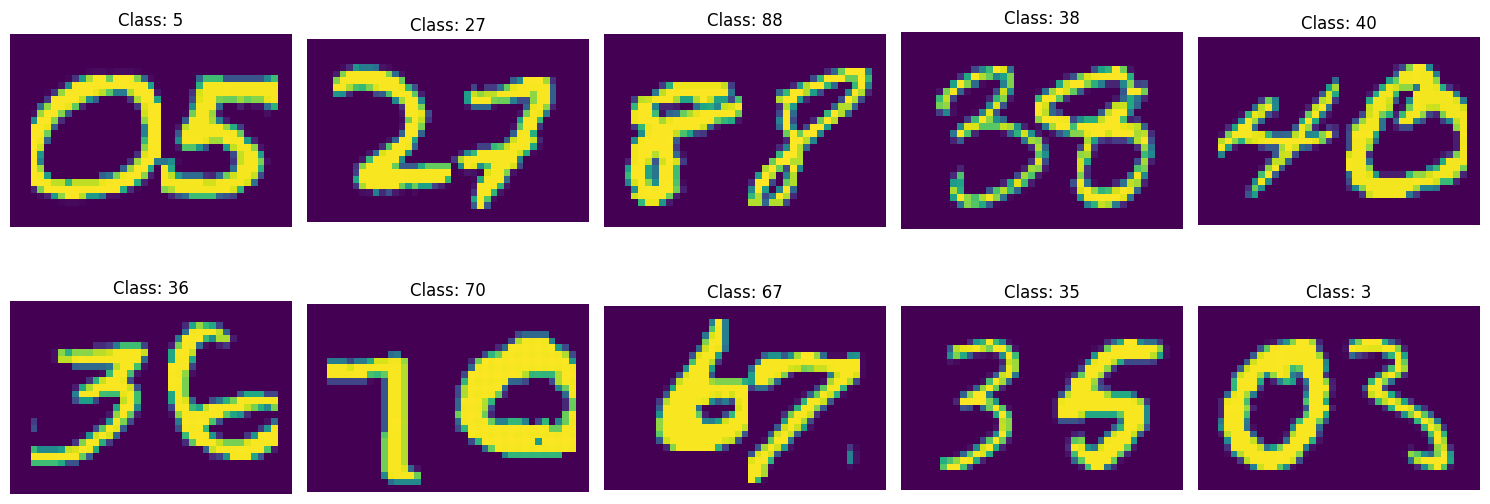

validation


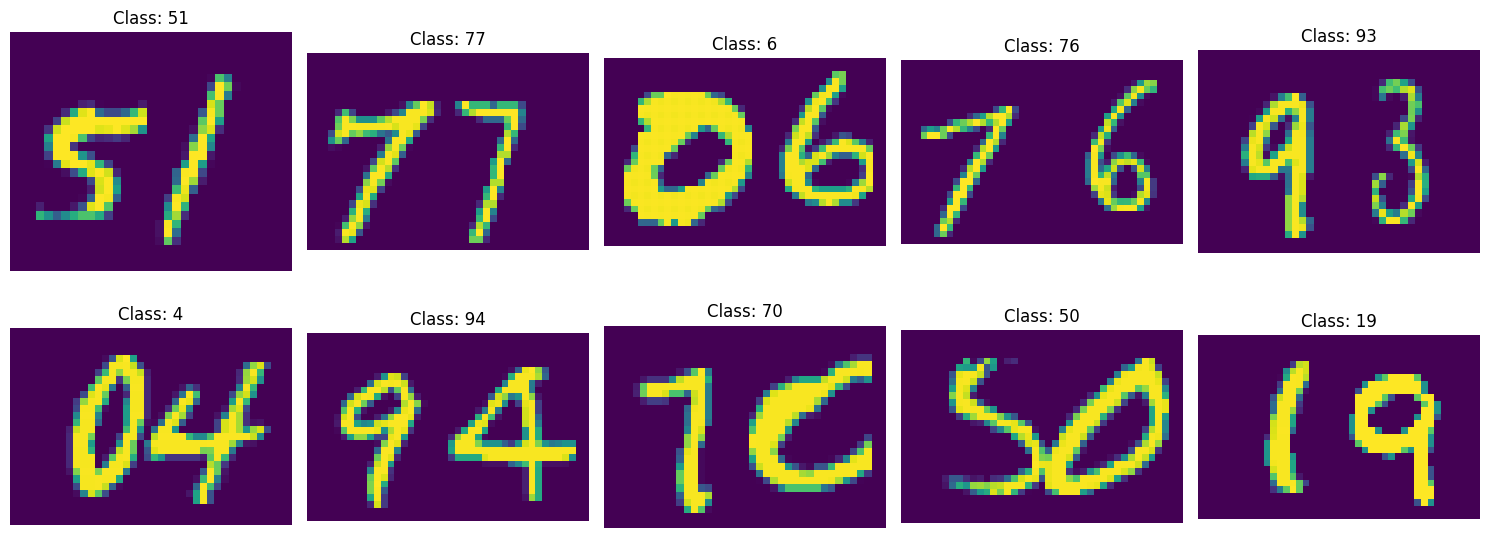

test


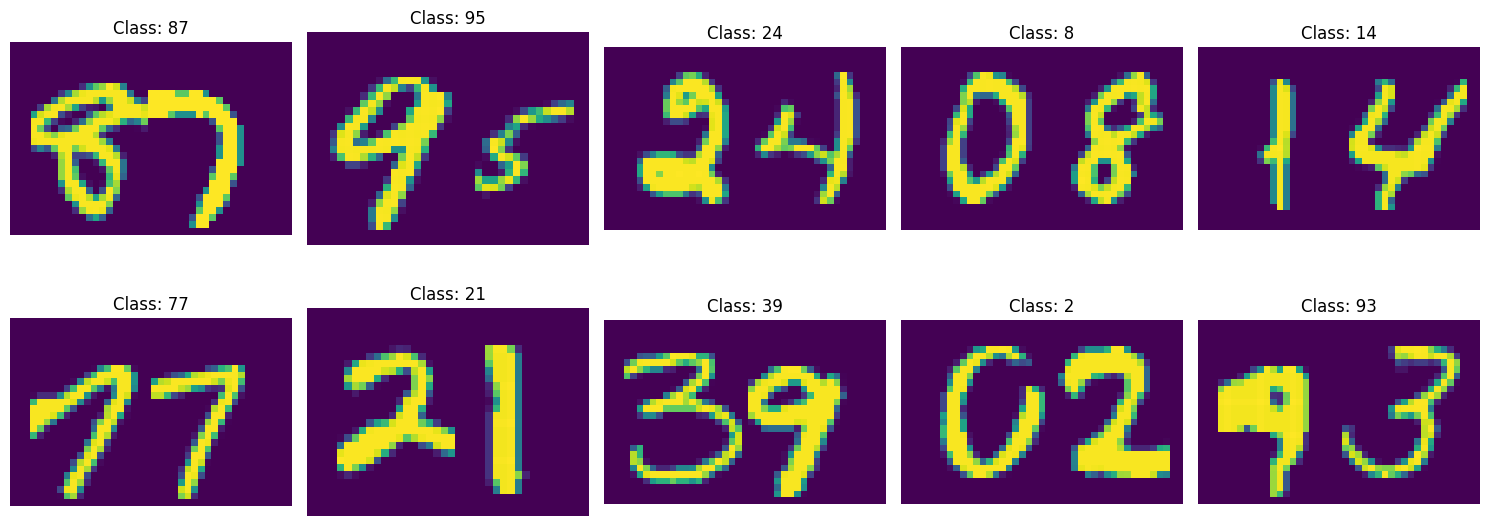

In [49]:
import random
import os
from PIL import Image
import matplotlib.pyplot as plt

data_dir = '/content/extracted_images/images'
temp_dataset = ['train','validation','test']

for k in range(3):

  if k == 0:
    selected_classes = random.sample(train.classes, 10)
  elif k == 1:
    selected_classes = random.sample(validation.classes, 10)
  else:
    selected_classes = random.sample(test.classes, 10)

  # Show images of 10 different classes in one drawing
  plt.figure(figsize=(15, 6))

  for i, selected_class in enumerate(selected_classes, 1):
      plt.subplot(2, 5, i)
      plt.title(f"Class: {selected_class}")

      # Find the folder path of the selected class
      class_dir = os.path.join(data_dir, temp_dataset[k], selected_class)

      # Randomly select an image within the folder
      random_image_name = random.choice(os.listdir(class_dir))
      image_path = os.path.join(class_dir, random_image_name)

      # Upload the image and show it on the screen
      image = Image.open(image_path)
      plt.imshow(image)
      plt.axis('off')

  print(temp_dataset[k])
  plt.tight_layout()
  plt.show()


### Preparing Data

In [50]:
train_loader = DataLoader(train, batch_size=64 , shuffle= True)
validation_loader = DataLoader(validation, batch_size=64 , shuffle= True)
test_loader = DataLoader(test, batch_size=64 , shuffle= True)

In [51]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


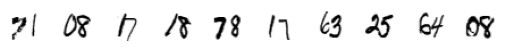

In [52]:
import matplotlib.pyplot as plt

figure = plt.figure()
num_of_images = 10
for index in range(1, num_of_images + 1):
    plt.subplot(10, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')


# Train a deep learning model

## Train and Test Model

### Convolutional Neural Networks

#### Define a CNN model

In [53]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolution layers
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 100)  # Output layer for 100 classes

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 64 * 5 * 5)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        x = nn.functional.log_softmax(x, dim=1)
        return x


### Train The CNN Model

In [88]:
from torch import optim

# Create the model
# The model is reset every time "model = CNN()" is run.
model = CNN()

criterion = nn.CrossEntropyLoss() # Loss function

# I tried different optimization algorithms and learning_rate
# until I find the best accuracy.
optimizer = optim.Adam(model.parameters(), lr=0.002) # Result Accurancy Rate: 92.90%
#optimizer = optim.RMSprop(model.parameters(), lr=0.002) # Result Accurancy Rate: 89.20%

# Training cycle
for epoch in range(40):
    model.train()  # Put the model in training mode
    for batch_data, batch_labels in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_data)
        loss = criterion(outputs, batch_labels)  # Calculate the loss
        loss.backward()  # Calculate backward gradient
        optimizer.step()  # Update parameters

### Define 'test_CNN_model' function to test and validation data

Since I do not want to write the same code over and over again for testing, validation, I defined a function.


In [55]:
import torch

def test_CNN_model(_dataset):
	model.eval()  # Put the model in evaluation mode
	correct = 0
	total = 0

	with torch.no_grad():
		for batch_data, batch_labels in _dataset:
			outputs = model(batch_data)
			_, predicted = torch.max(outputs, 1)
			total += batch_labels.size(0)
			correct += (predicted == batch_labels).sum().item()
			accuracy = 100 * correct / total

	print(f'Result Accurancy Rate: {accuracy:.2f}%')

## Validation

In [89]:
test_CNN_model(validation_loader)

Result Accurancy Rate: 97.44%



The accuracy rate requested in the Task is 80%.

My target is 90%. Since I have achieved this goal, I stop improving the model and move on to the testing phase.

## Test

In [90]:
test_CNN_model(test_loader)

Result Accurancy Rate: 93.50%


---

**Result Accurancy Rate for test data: 93.50%.**

---


## Addition Part


In addition to Task, I want to add 2 more features.

1) I want to save the model I trained.
(You can also load this model that I trained and put it to another test.)

2) Manual testing. I'll show the model a few images and ask for its prediction.

### Save the model

In [58]:
#######
# You don't need to run this code again.
#######
import torch
torch.save(model.state_dict(), "CNN_model.pth")

### Load The CNN Model

In [91]:
#######
# You must run this code part to copy the model I trained  from my drive.
# After this code runs, you will see a copy of it in the environment you are working in.
#######
import gdown

file_url = 'https://drive.google.com/uc?id=18efEU7Ivd1d2FNLaa9uMbFGRFe8v-YuE'
file_name = 'CNN_model.pth'
gdown.download(file_url, file_name, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=18efEU7Ivd1d2FNLaa9uMbFGRFe8v-YuE
To: /content/CNN_model.pth
100%|██████████| 949k/949k [00:00<00:00, 102MB/s]


'CNN_model.pth'

In [92]:
#######
# You must run the "Convolutional Neural Networks" part once.
# So you can run the CNN() model.
#######
import torch

loaded_model = CNN()
loaded_model.load_state_dict(torch.load("CNN_model.pth"))

<All keys matched successfully>


If you see "**All keys matched successfully**", the model has been loaded and everything is fine.

### Manual(Individual) Test

In [61]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

def compute_accuracy(predictions, labels):

    correct = (predictions == labels).sum().item() # Count the number of times the predictions were correct
    total = labels.size(0) # Calculate the total number of samples
    accuracy = correct / total
    return accuracy

def create_transform():
    transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
    ])

def show_image_and_prediction(path):
    create_transform()

    image = Image.open(path)
    image = transform(image).unsqueeze(0)  # Convert image to tensor and adjust its size


    # Example path: "/content/extracted_images/images/test/1/107.png"
    # The folder name gives the expected number. Ex: .../1/107.png
    parts = path.split('/')
    actual_number_str = parts[-2]
    actual_number = int(actual_number_str)

    with torch.no_grad():
        loaded_model.eval()
        prediction = loaded_model(image)
        predicted_class = torch.argmax(prediction, dim=1).item()
        print(f"Predicted: {predicted_class}" +f"\nActual: {actual_number}" )

        # Calculate and print accuracy
        labels = torch.tensor([actual_number])  # Convert real labels to tensor
        accuracy = compute_accuracy(predicted_class, labels)
        print(f"Accuracy: {accuracy * 100:.2f}%")


    image_np = image.squeeze().numpy()
    plt.imshow(image_np, cmap='gray_r')
    plt.axis('off')
    plt.show()
    print("\n" )


Predicted: 90
Actual: 90
Accuracy: 100.00%


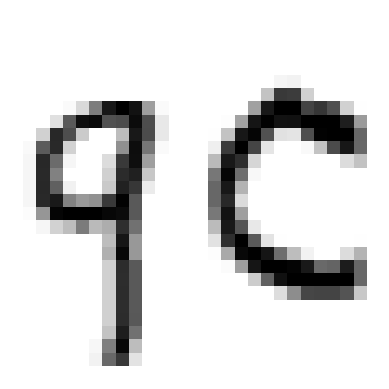



Predicted: 0
Actual: 0
Accuracy: 100.00%


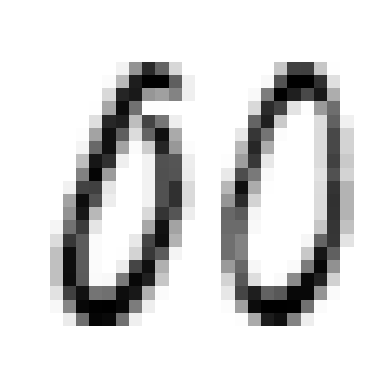



Predicted: 26
Actual: 32
Accuracy: 0.00%


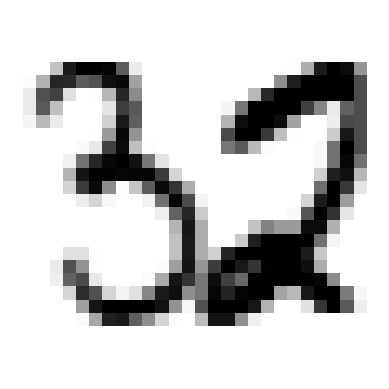



Predicted: 99
Actual: 99
Accuracy: 100.00%


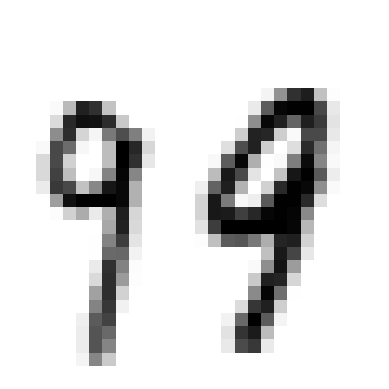

In [93]:
images_paths  = ["/content/extracted_images/images/test/90/24.png",
              "/content/extracted_images/images/test/0/267.png",
              "/content/extracted_images/images/test/32/477.png",
              "/content/extracted_images/images/test/99/154.png"]

for image_path in images_paths:
  show_image_and_prediction(image_path)
